In [353]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [354]:
#importing the data for all matches
df_matches= pd.read_excel('DIM_MATCH.xlsx',sheet_name='MATCH')

In [355]:
#display matches
df_matches.head()

,Match_SK,match_id,Team1,Team2,match_date,Season_Year,Venue_Name,City_Name,Country_Name,Toss_Winner,match_winner,Toss_Name,Win_Type,Outcome_Type,ManOfMach,Win_Margin,Country_id
0,546,980964,Royal Challengers Bangalore,Kolkata Knight Riders,2016-05-02,2016,M Chinnaswamy Stadium,Bangalore,India,Kolkata Knight Riders,Kolkata Knight Riders,field,wickets,Result,AD Russell,5.0,1
1,547,980966,Gujarat Lions,Delhi Daredevils,2016-05-03,2016,Saurashtra Cricket Association Stadium,Rajkot,India,Delhi Daredevils,Delhi Daredevils,field,wickets,Result,RR Pant,8.0,1
2,548,980968,Kolkata Knight Riders,Kings XI Punjab,2016-05-04,2016,Eden Gardens,Kolkata,India,Kings XI Punjab,Kolkata Knight Riders,field,runs,Result,AD Russell,7.0,1
3,549,980970,Delhi Daredevils,Rising Pune Supergiants,2016-05-05,2016,Feroz Shah Kotla,Delhi,India,Rising Pune Supergiants,Rising Pune Supergiants,field,wickets,Result,AM Rahane,7.0,1
4,550,980972,Sunrisers Hyderabad,Gujarat Lions,2016-05-06,2016,"Rajiv Gandhi International Stadium, Uppal",Hyderabad,India,Sunrisers Hyderabad,Sunrisers Hyderabad,field,wickets,Result,B Kumar,5.0,1


In [356]:
#number of games played by each team
np.ar= df_matches.groupby('Team1').size() + df_matches.groupby('Team2').size()
np.ar

Team1
Chennai Super Kings            131
Deccan Chargers                 75
Delhi Daredevils               147
Gujarat Lions                   30
Kings XI Punjab                148
Kochi Tuskers Kerala            14
Kolkata Knight Riders          148
Mumbai Indians                 157
Pune Warriors                   46
Rajasthan Royals               118
Rising Pune Supergiants         30
Royal Challengers Bangalore    153
Sunrisers Hyderabad             77
dtype: int64

In [357]:
#total number of wins for each team
np.win = df_matches.groupby('match_winner').size()
np.win

match_winner
Chennai Super Kings            79
Deccan Chargers                29
Delhi Daredevils               62
Gujarat Lions                  13
Kings XI Punjab                70
Kochi Tuskers Kerala            6
Kolkata Knight Riders          77
Mumbai Indians                 91
Pune Warriors                  12
Rajasthan Royals               63
Rising Pune Supergiants        15
Royal Challengers Bangalore    73
Sunrisers Hyderabad            42
abandoned                       1
tied                            1
dtype: int64

In [358]:
#winning percentage of each team
np.perwin = (np.win / np.ar)*100
np.perwin

Chennai Super Kings            60.305344
Deccan Chargers                38.666667
Delhi Daredevils               42.176871
Gujarat Lions                  43.333333
Kings XI Punjab                47.297297
Kochi Tuskers Kerala           42.857143
Kolkata Knight Riders          52.027027
Mumbai Indians                 57.961783
Pune Warriors                  26.086957
Rajasthan Royals               53.389831
Rising Pune Supergiants        50.000000
Royal Challengers Bangalore    47.712418
Sunrisers Hyderabad            54.545455
abandoned                            NaN
tied                                 NaN
dtype: float64

In [359]:
import plotly.plotly as py
import plotly
import plotly.graph_objs as go
init_notebook_mode(connected=True)
from plotly import version
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [360]:
#plotting the 1st bar graph
trace0 = go.Bar(
    x=['Chennai Super Kings ', 'Deccan Chargers', 'Delhi Daredevils', 'Gujarat Lions', 'Kings XI Punjab', 'Kochi Tuskers Kerala', 'Kolkata Knight Riders', 'Mumbai Indians', 'Pune Warriors', 'Rajasthan Royals', 'Rising Pune Supergiants', 'Royal Challengers Bangalore', 'Sunrisers Hyderabad'],
    y=[60.31, 38.67, 42.18, 43.33, 47.30, 42.86, 52.03, 57.97, 26.09, 53.39, 50.00, 47.71, 54.55],
    text=['win percentage', 'win percentage', 'win percentage', 'win percentage', 'win percentage', 'win percentage', 'win percentage', 'win percentage', 'win percentage', 'win percentage', 'win percentage', 'win percentage', 'win percentage'],
    marker=dict(
        color='rgb(158,202,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        )
    ),
    opacity=0.6
)

data = [trace0]
layout = go.Layout(
    title='Win Percentage of Every Team Since 2008 to 2017',
    yaxis=dict(
        type='linear',
        range=[1, 100],
        dtick=20,
        ticksuffix='%'
    )
)

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='text-hover-bar')

In [361]:
#importing the 2nd file with players data
df_player = pd.read_excel('DIM_PLAYER_1.xlsx', sheet_name = 'DIM_PLAYER')

In [362]:
#showing players details
df_player.head()

,PLAYER_SK,Player_Id,Player_Name,DOB,Batting_hand,Bowling_skill,Country_Name,Country_Code
0,0,1,SC Ganguly,1972-07-08,Left-hand bat,Right-arm medium,India,IND
1,1,2,BB McCullum,1981-09-27,Right-hand bat,Right-arm medium,New Zealand,NZL
2,2,3,RT Ponting,1974-12-19,Right-hand bat,Right-arm medium,Australia,AUS
3,3,4,DJ Hussey,1977-07-15,Right-hand bat,Right-arm offbreak,Australia,AUS
4,4,5,Mohammad Hafeez,1980-10-17,Right-hand bat,Right-arm offbreak,Pakistan,PAK


In [363]:
player_info = df_player

In [364]:
player_info.head()

,PLAYER_SK,Player_Id,Player_Name,DOB,Batting_hand,Bowling_skill,Country_Name,Country_Code
0,0,1,SC Ganguly,1972-07-08,Left-hand bat,Right-arm medium,India,IND
1,1,2,BB McCullum,1981-09-27,Right-hand bat,Right-arm medium,New Zealand,NZL
2,2,3,RT Ponting,1974-12-19,Right-hand bat,Right-arm medium,Australia,AUS
3,3,4,DJ Hussey,1977-07-15,Right-hand bat,Right-arm offbreak,Australia,AUS
4,4,5,Mohammad Hafeez,1980-10-17,Right-hand bat,Right-arm offbreak,Pakistan,PAK


In [365]:
#merging the data of matches with the data of players with respect to player name
mom = pd.merge(df_matches, player_info, left_on = 'ManOfMach', right_on = 'Player_Name', how = 'outer')

In [366]:
mom.head()

,Match_SK,match_id,Team1,Team2,match_date,Season_Year,Venue_Name,City_Name,Country_Name_x,Toss_Winner,...,Win_Margin,Country_id,PLAYER_SK,Player_Id,Player_Name,DOB,Batting_hand,Bowling_skill,Country_Name_y,Country_Code
0,546.0,980964.0,Royal Challengers Bangalore,Kolkata Knight Riders,2016-05-02,2016.0,M Chinnaswamy Stadium,Bangalore,India,Kolkata Knight Riders,...,5.0,1.0,333.0,334.0,AD Russell,1988-04-29,Right-hand bat,Right-arm fast,West Indies,TTO
1,548.0,980968.0,Kolkata Knight Riders,Kings XI Punjab,2016-05-04,2016.0,Eden Gardens,Kolkata,India,Kings XI Punjab,...,7.0,1.0,333.0,334.0,AD Russell,1988-04-29,Right-hand bat,Right-arm fast,West Indies,TTO
2,467.0,829728.0,Kolkata Knight Riders,Chennai Super Kings,2015-04-30,2015.0,Eden Gardens,Kolkata,India,Kolkata Knight Riders,...,7.0,1.0,333.0,334.0,AD Russell,1988-04-29,Right-hand bat,Right-arm fast,West Indies,TTO
3,472.0,829738.0,Kings XI Punjab,Kolkata Knight Riders,2015-04-18,2015.0,Maharashtra Cricket Association Stadium,Pune,India,Kolkata Knight Riders,...,4.0,1.0,333.0,334.0,AD Russell,1988-04-29,Right-hand bat,Right-arm fast,West Indies,TTO
4,500.0,829796.0,Kolkata Knight Riders,Kings XI Punjab,2015-05-09,2015.0,Eden Gardens,Kolkata,India,Kings XI Punjab,...,1.0,1.0,333.0,334.0,AD Russell,1988-04-29,Right-hand bat,Right-arm fast,West Indies,TTO


In [367]:
#countrys containing total man of the matches
np.mom_country = mom.groupby('Country_Name_y').size()
np.mom_country

Country_Name_y
Afghanistan       3
Australia       159
Bangladesh        6
England          20
India           504
Netherlands       1
New Zealand      34
Pakistan         15
South Africa     83
Sri Lanka        34
West Indies      67
Zimbabwea         2
dtype: int64

In [368]:
#Man of the Matches each season group by country
year_mom = mom.groupby(['Season_Year']).Country_Name_y.value_counts().reset_index(name = 'count')

In [369]:
year_mom.head()

,Season_Year,Country_Name_y,count
0,2008.0,India,23
1,2008.0,Australia,16
2,2008.0,South Africa,7
3,2008.0,Sri Lanka,5
4,2008.0,Pakistan,4


In [370]:
mom_Country_list_2008=year_mom['Country_Name_y'].where(year_mom['Season_Year'] == 2008).dropna().tolist()
mom_Count_list_2008=year_mom['count'].where(year_mom['Season_Year'] == 2008).dropna().tolist()
mom_Country_list_2009=year_mom['Country_Name_y'].where(year_mom['Season_Year'] == 2009).dropna().tolist()
mom_Count_list_2009=year_mom['count'].where(year_mom['Season_Year'] == 2009).dropna().tolist()
mom_Country_list_2010=year_mom['Country_Name_y'].where(year_mom['Season_Year'] == 2010).dropna().tolist()
mom_Count_list_2010=year_mom['count'].where(year_mom['Season_Year'] == 2010).dropna().tolist()
mom_Country_list_2011=year_mom['Country_Name_y'].where(year_mom['Season_Year'] == 2011).dropna().tolist()
mom_Count_list_2011=year_mom['count'].where(year_mom['Season_Year'] == 2011).dropna().tolist()
mom_Country_list_2012=year_mom['Country_Name_y'].where(year_mom['Season_Year'] == 2012).dropna().tolist()
mom_Count_list_2012=year_mom['count'].where(year_mom['Season_Year'] == 2012).dropna().tolist()
mom_Country_list_2013=year_mom['Country_Name_y'].where(year_mom['Season_Year'] == 2013).dropna().tolist()
mom_Count_list_2013=year_mom['count'].where(year_mom['Season_Year'] == 2013).dropna().tolist()
mom_Country_list_2014=year_mom['Country_Name_y'].where(year_mom['Season_Year'] == 2014).dropna().tolist()
mom_Count_list_2014=year_mom['count'].where(year_mom['Season_Year'] == 2014).dropna().tolist()
mom_Country_list_2015=year_mom['Country_Name_y'].where(year_mom['Season_Year'] == 2015).dropna().tolist()
mom_Count_list_2015=year_mom['count'].where(year_mom['Season_Year'] == 2015).dropna().tolist()
mom_Country_list_2016=year_mom['Country_Name_y'].where(year_mom['Season_Year'] == 2016).dropna().tolist()
mom_Count_list_2016=year_mom['count'].where(year_mom['Season_Year'] == 2016).dropna().tolist()
mom_Country_list_2017=year_mom['Country_Name_y'].where(year_mom['Season_Year'] == 2017).dropna().tolist()
mom_Count_list_2017=year_mom['count'].where(year_mom['Season_Year'] == 2017).dropna().tolist()


In [371]:
trace_2008 = go.Scatter(x=mom_Country_list_2008,
                        y=mom_Count_list_2008,
                        name='2009',
                        line=dict(color='#33CFA5'))

trace_2009 = go.Scatter(x=mom_Country_list_2009,
                        y=mom_Count_list_2009,
                        name='2009',
                        line=dict(color='#DC143C'))

trace_2010 = go.Scatter(x=mom_Country_list_2010,
                        y=mom_Count_list_2010,
                        name='2010',
                        line=dict(color='#FFD700'))

trace_2011 = go.Scatter(x=mom_Country_list_2011,
                        y=mom_Count_list_2011,
                        name='2011',
                        line=dict(color='#000080'))

trace_2012 = go.Scatter(x=mom_Country_list_2012,
                        y=mom_Count_list_2012,
                        name='2012',
                        line=dict(color='#BA55D3'))

trace_2013 = go.Scatter(x=mom_Country_list_2013,
                        y=mom_Count_list_2013,
                        name='2013',
                        line=dict(color='#33CFA5'))

trace_2014 = go.Scatter(x=mom_Country_list_2014,
                        y=mom_Count_list_2014,
                        name='2014',
                        line=dict(color='#DC143C'))

trace_2015 = go.Scatter(x=mom_Country_list_2015,
                        y=mom_Count_list_2015,
                        name='2015',
                        line=dict(color='#FFD700'))

trace_2016 = go.Scatter(x=mom_Country_list_2016,
                        y=mom_Count_list_2016,
                        name='2016',
                        line=dict(color='#000080'))

trace_2017 = go.Scatter(x=mom_Country_list_2017,
                        y=mom_Count_list_2017,
                        name='2017',
                        line=dict(color='#BA55D3'))




In [379]:
data = [trace_2008,trace_2009,trace_2010,trace_2011,trace_2012,trace_2013,trace_2014,trace_2015,trace_2016,trace_2017]



updatemenus = list([
    dict(active=-1,
         buttons=list([   
            dict(label = '2008',
                 method = 'update',
                 args = [{'visible': [True, False, False,False,False, False, False,False,False,False]},
                         {'title': 'Man of the Matches in year 2008 for IPL'}]),
             dict(label = '2009',
                 method = 'update',
                 args = [{'visible': [False, True, False,False,False, False, False,False,False,False]},
                         {'title': 'Man of the Matches in year 2009 for IPL'}]),
             dict(label = '2010',
                 method = 'update',
                 args = [{'visible': [False, False, True,False,False, False, False,False,False,False]},
                         {'title': 'Man of the Matches in year 2010 for IPL'}]),
             dict(label = '2011',
                 method = 'update',
                 args = [{'visible': [False, False, False,True,False, False, False,False,False,False]},
                         {'title': 'Man of the Matches in year 2011 for IPL'}]),
             dict(label = '2012',
                 method = 'update',
                 args = [{'visible': [False, False, False,False,True, False, False,False,False,False]},
                         {'title': 'Man of the Matches in year 2012 for IPL'}]),
             dict(label = '2013',
                 method = 'update',
                 args = [{'visible': [False, False, False,False,False, True, False,False,False,False]},
                         {'title': 'Man of the Matches in year 2013 for IPL'}]),
             dict(label = '2014',
                 method = 'update',
                 args = [{'visible': [False, False, False,False,False, False, True,False,False,False]},
                         {'title': 'Man of the Matches in year 2014 for IPL'}]),
             dict(label = '2015',
                 method = 'update',
                 args = [{'visible': [False, False, False,False,False, False, False,True,False,False]},
                         {'title': 'Man of the Matches in year 2015 for IPL'}]),
             dict(label = '2016',
                 method = 'update',
                 args = [{'visible': [False, False, False,False,False, False, False,False,True,False]},
                         {'title': 'Man of the Matches in year 2016 for IPL'}]),
             dict(label = '2017',
                 method = 'update',
                 args = [{'visible': [False, False, False,False,False, False, False,False,False,True]},
                         {'title': 'Man of the Matches in year 2017 for IPL'}])
             ]),
    )
])

layout = dict(title='Man Of the Match for IPL 2008-2017', showlegend=False,
              updatemenus=updatemenus,
                yaxis=dict(
        title='Number of Players',
    ),)


fig = dict(data=data, layout=layout)
plotly.offline.iplot(fig, filename='update_dropdown')

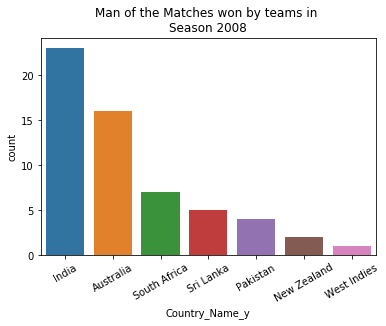

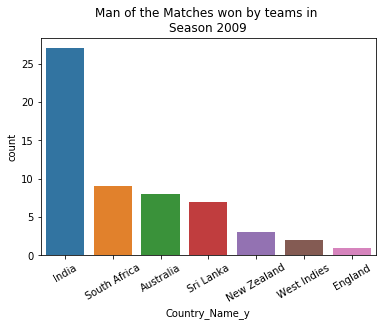

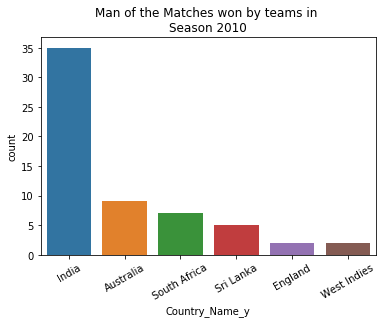

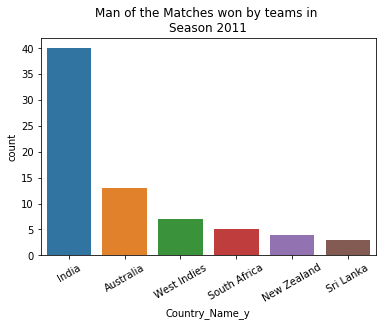

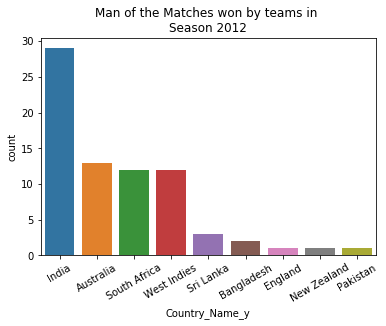

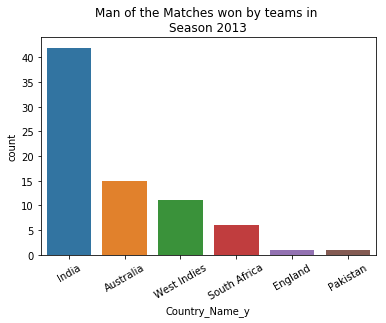

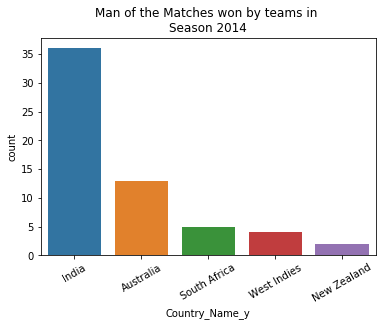

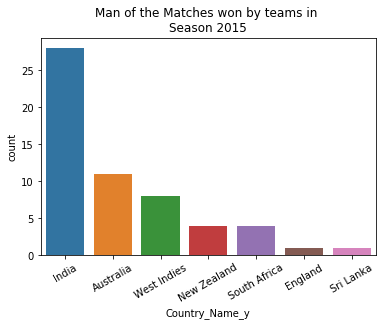

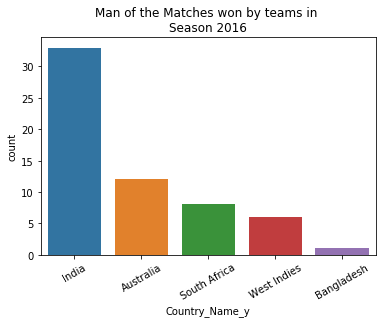

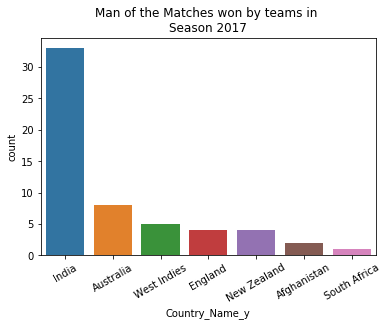

In [373]:
#plot2 ploting the bar graph of each year with man of the matches by country
for x in range(2008, 2018, 1):
    year_mom_x = year_mom[year_mom['Season_Year'] == x]
    plot = sns.barplot(x="Country_Name_y", y="count", data=year_mom_x)
    plot.set_title('Man of the Matches won by teams in \nSeason ' +str(x))
    plot.set_xticklabels(year_mom_x['Country_Name_y'],rotation=30)
    plt.show()
    x+=1
    

In [374]:
year_mom_xx

,Season_Year,Country_Name_y,count
58,2017.0,India,33
59,2017.0,Australia,8
60,2017.0,West Indies,5
61,2017.0,England,4
62,2017.0,New Zealand,4
63,2017.0,Afghanistan,2
64,2017.0,South Africa,1


In [375]:
#total man of the matches won by respective countrys
mom_country = mom.groupby([ 'Country_Code']).Country_Name_y.value_counts().reset_index(name = 'count')

In [376]:
mom_country

,Country_Code,Country_Name_y,count
0,AFG,Afghanistan,3
1,AUS,Australia,159
2,BGD,Bangladesh,6
3,GBR,England,20
4,IND,India,504
5,LKA,Sri Lanka,34
6,NLD,Netherlands,1
7,NZL,New Zealand,34
8,PAK,Pakistan,15
9,TTO,West Indies,67


In [377]:
#plot 3 plotting the data for total man of the matches by country in the world map
for col in mom_country.columns:
    mom_country[col] = mom_country[col].astype(str)



In [378]:
data = [ dict(
        type = 'choropleth',
        locations = mom_country['Country_Code'],
        z = mom_country['count'],
        text = 'Country Name : ' + mom_country['Country_Name_y'] + '<br>' + 'Total Number of Man of Matches' + '<br>' + mom_country['count']+'<br>',
           colorscale=[[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(166,206,227)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = True,
            title = 'Man of the Matches'),
      ) ]
layout = dict(
    title = '2008-2017 Man Of Matches of IPL </a>',
    geo = dict(
        showframe = True,
        showcoastlines = True,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
plotly.offline.plot( fig, validate=False, filename='d3-world-map' )

C:\Users\Sabyasachi Modak\Anaconda3\lib\site-packages\plotly\offline\offline.py:621: UserWarning:

Your filename `d3-world-map` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Sabyasachi Modak\\Desktop\\Assignment\\Data Visulaization\\CA682_Final_Assignment\\d3-world-map.html'